Customer Segmentation Using K-Means Clustering

In [74]:

# handle table-like data and matrices
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# preprocessing
from sklearn.preprocessing import StandardScaler

# pca
from sklearn.decomposition import PCA

# clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering

# evaluations
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

Import Data and handle missing values

### Dataset Features

- **ID:** Customer's unique identifier
- **Year_Birth:** Customer's birth year
- **Education:** Customer's education level
- **Marital_Status:** Customer's marital status
- **Income:** Customer's yearly household income
- **Kidhome:** Number of children in customer's household
- **Teenhome:** Number of teenagers in customer's household
- **Dt_Customer:** Date of customer's enrollment with the company
- **Recency:** Number of days since customer's last purchase
- **Complain:** 1 if the customer complained in the last 2 years, 0 otherwise
- **MntWines:** Amount spent on wine in last 2 years
- **MntFruits:** Amount spent on fruits in last 2 years
- **MntMeatProducts:** Amount spent on meat in last 2 years
- **MntFishProducts:** Amount spent on fish in last 2 years
- **MntSweetProducts:** Amount spent on sweets in last 2 years
- **MntGoldProds:** Amount spent on gold in last 2 years
- **NumDealsPurchases:** Number of purchases made with a discount
- **AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise
- **NumWebPurchases:** Number of purchases made through the company’s website
- **NumCatalogPurchases:** Number of purchases made using a catalogue
- **NumStorePurchases:** Number of purchases made directly in stores
- **NumWebVisitsMonth:** Number of visits to company’s website in the last month

In [75]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")  

In [76]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<Axes: >

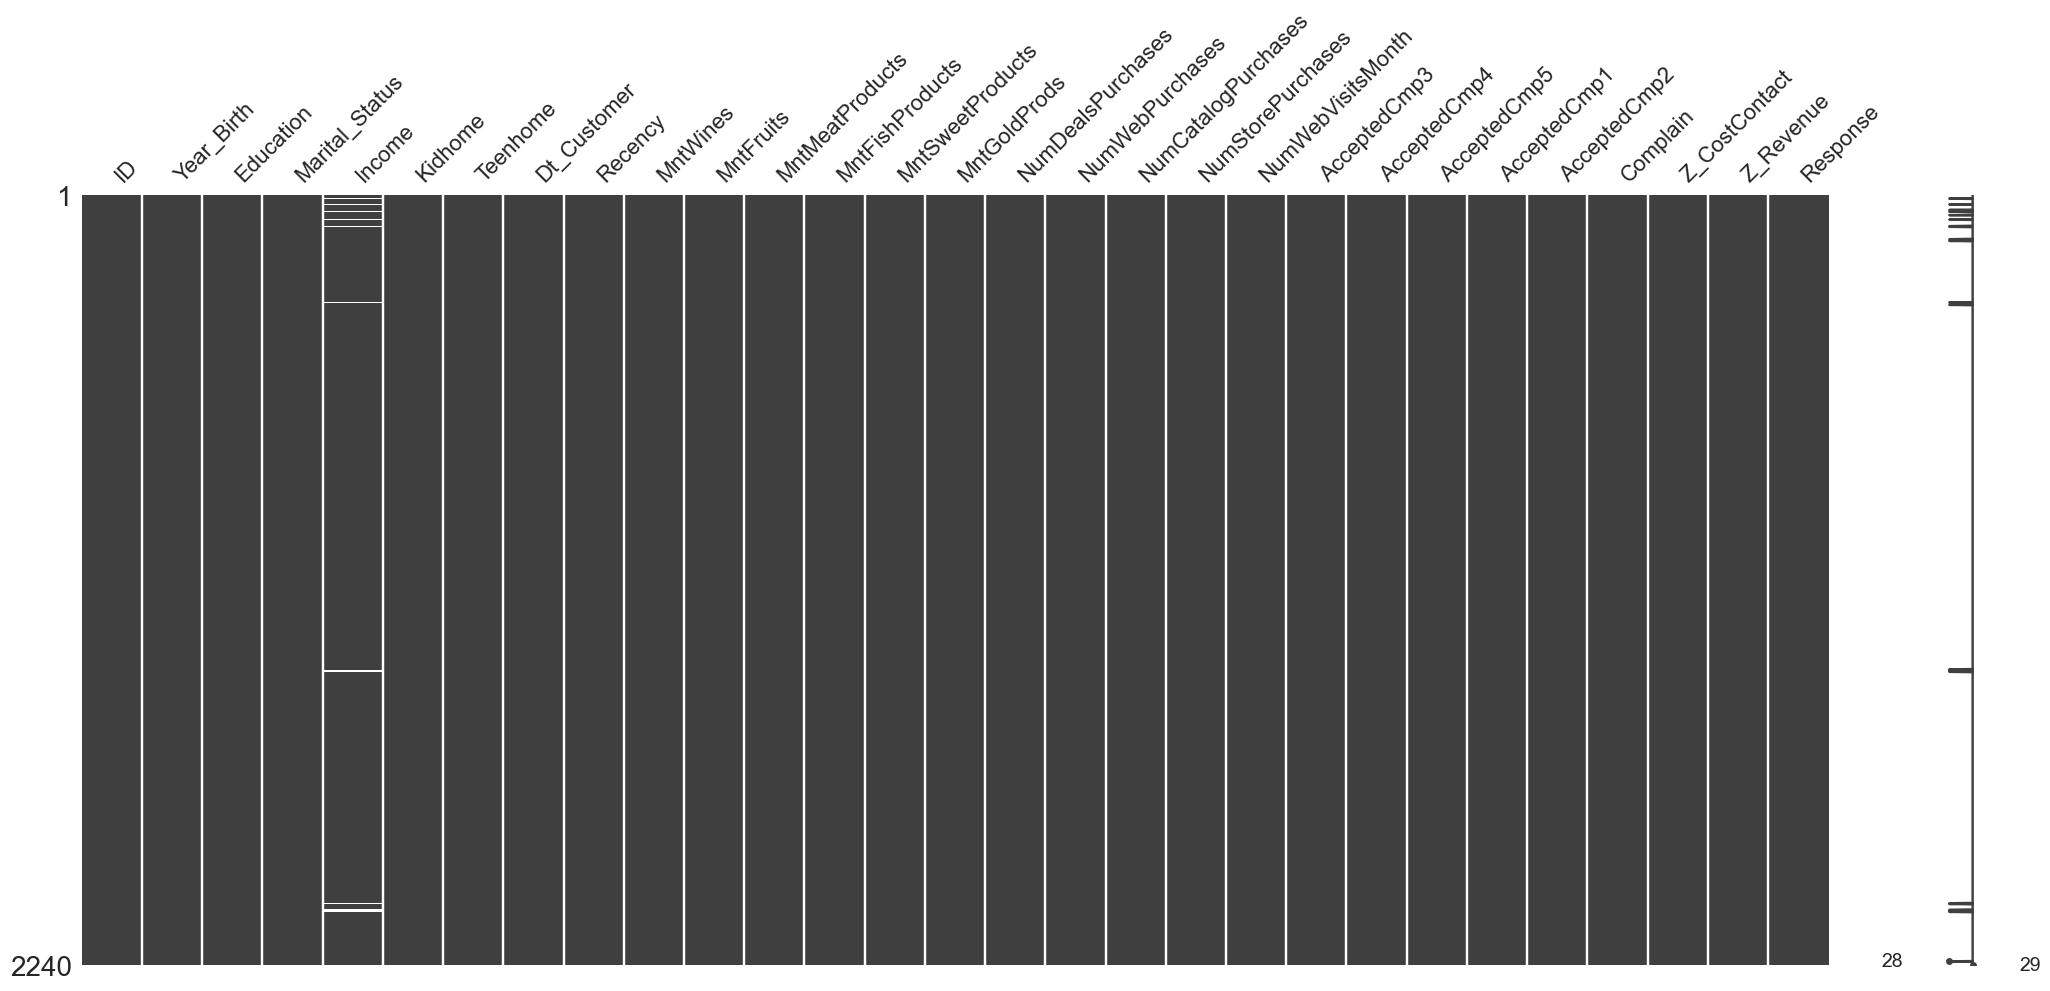

In [77]:

msno.matrix(df)

In [78]:
df = df.dropna()

In [79]:
df.isnull().sum()
     

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [80]:
df.duplicated().sum()

0

Feature Engineering

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [82]:
#Dt_Customer is not datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='mixed', dayfirst=True)

In [83]:
print("The newest customer's enrolment date in the records:", max(df['Dt_Customer']))
print("The oldest customer's enrolment date in the records:", min(df['Dt_Customer']))

The newest customer's enrolment date in the records: 2014-06-29 00:00:00
The oldest customer's enrolment date in the records: 2012-07-30 00:00:00


In [84]:
#Extract the age of the customer
df['Age'] = 2024 - df['Year_Birth']  

In [85]:
#Create a feature called Expenditure indicating the total amount spent by the customer in various categories over the span of two years.
df['Expenditure'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

#Create a feature called Stays_with indicating the living situation.
df['Stays_With'] = df['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})
  
#create a feature called offspring indicating the number of children the customer has.
df['Offspring'] = df['Kidhome'] + df['Teenhome'] 

#create a feature called family_size to find out the number of people living in the family.
df['Family_Size'] = df['Stays_With'].replace({'Alone': 1, 'Partner':2}) + df['Offspring']  

#Create a feature "Is_Parent" to indicate parenthood status
df['Is_Parent'] = np.where(df.Offspring > 0, 1, 0)  

#Segmentation of education level
df['Education'] = df['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})
     

In [86]:
#Drop the features that are not important
drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
df = df.drop(drop, axis=1)
     

In [87]:
df.head()

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0      Graduate  58138.0        0         0       58       635         88   
1      Graduate  46344.0        1         1       38        11          1   
2      Graduate  71613.0        0         0       26       426         49   
3      Graduate  26646.0        1         0       26        11          4   
4  Postgraduate  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   
3               20               10                 3             5   
4              118               46                27            15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  Age  Expenditure Stays_With  Offspring  \
0             0         0         1   67         1617      Alone          0   
1             0         0         0   70           27      Alone          2   
2             0         0         0   59          776    Partner          0   
3             0         0         0   40           53    Partner          1   
4             0         0         0   43          422    Partner          1   

   Family_Size  Is_Parent  
0            1          0  
1            3          1  
2            2          0  
3            3          1  
4            3          1

Data Visualization

In [88]:

df.shape

(2216, 29)

In [89]:
df.describe()

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2216.000000      2216.000000      2216.000000       2216.000000   
mean     26.356047       166.995939        37.637635         27.028881   
std      39.793917       224.283273        54.752082         41.072046   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        68.000000        12.000000          8.000000   
75%      33.000000       232.250000        50.000000         33.000000   
max     199.000000      1725.000000       259.000000        262.000000   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count   2216.000000        2216.000000      2216.000000          2216.000000   
mean      43.965253           2.323556         4.085289             2.671029   
std       51.815414           1.923716         2.740951             2.926734   
min        0.000000           0.000000         0.000000             0.000000   
25%        9.000000           1.000000         2.000000             0.000000   
50%       24.500000           2.000000         4.000000             2.000000   
75%       56.000000           3.000000         6.000000             4.000000   
max      321.000000          15.000000        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count        2216.000000        2216.000000   2216.000000   2216.000000   
mean            5.800993           5.319043      0.073556      0.074007   
std             3.250785           2.425359      0.261106      0.261842   
min             0.000000           0.000000      0.000000      0.000000   
25%             3.000000           3.000000      0.000000      0.000000   
50%             5.000000           6.000000      0.000000      0.000000   
75%             8.000000           7.000000      0.000000      0.000000   
max            13.000000          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain     Response  \
count   2216.000000   2216.000000   2216.000000  2216.000000  2216.000000   
mean       0.073105      0.064079      0.013538     0.009477     0.150271   
std        0.260367      0.244950      0.115588     0.096907     0.357417   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000      0.000000     0.000000     0.000000   
75%        0.000000      0.000000      0.000000     0.000000     0.000000   
max        1.000000      1.000000      1.000000     1.000000     1.000000   

               Age  Expenditure    Offspring  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     55.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      28.000000     5.000000     0.000000     1.000000     0.000000  
25%      47.000000    69.000000     0.000000     2.000000     0.000000  
50%      54.000000   396.500000     1.000000     3.000000     1.000000  
75%      65.000000  1048.000000     1.000000     3.000000   

In [90]:
df.describe(include=object).T

count unique       top  freq
Education   2216      3  Graduate  1116
Stays_With  2216      2   Partner  1430

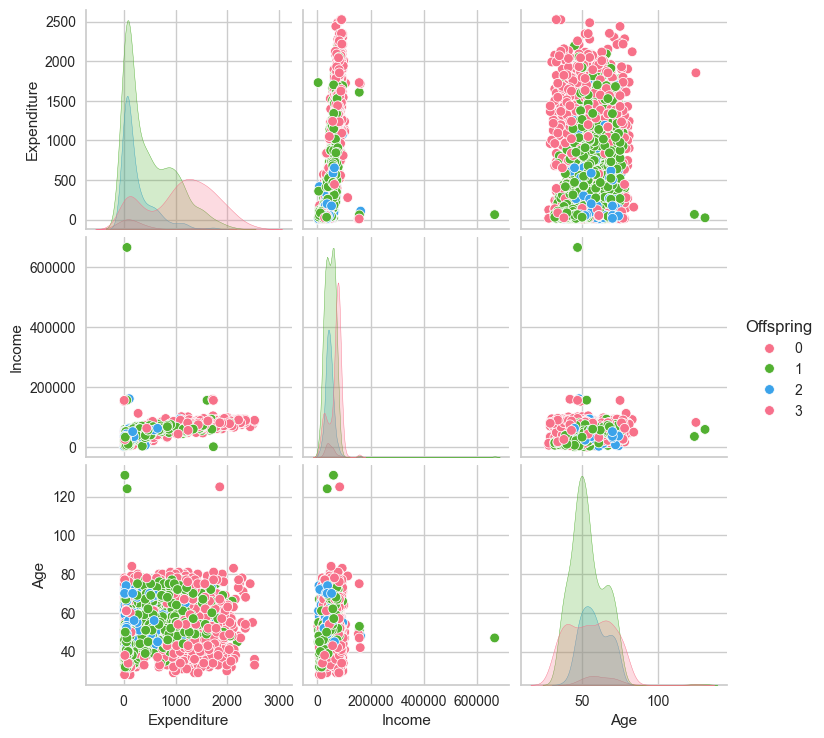

In [91]:
#Plot of Expenditure , Income and Age of Customer
sns.pairplot(df , vars=['Expenditure','Income','Age'] , hue='Offspring', palette='husl')

<Axes: xlabel='Expenditure', ylabel='Income'>

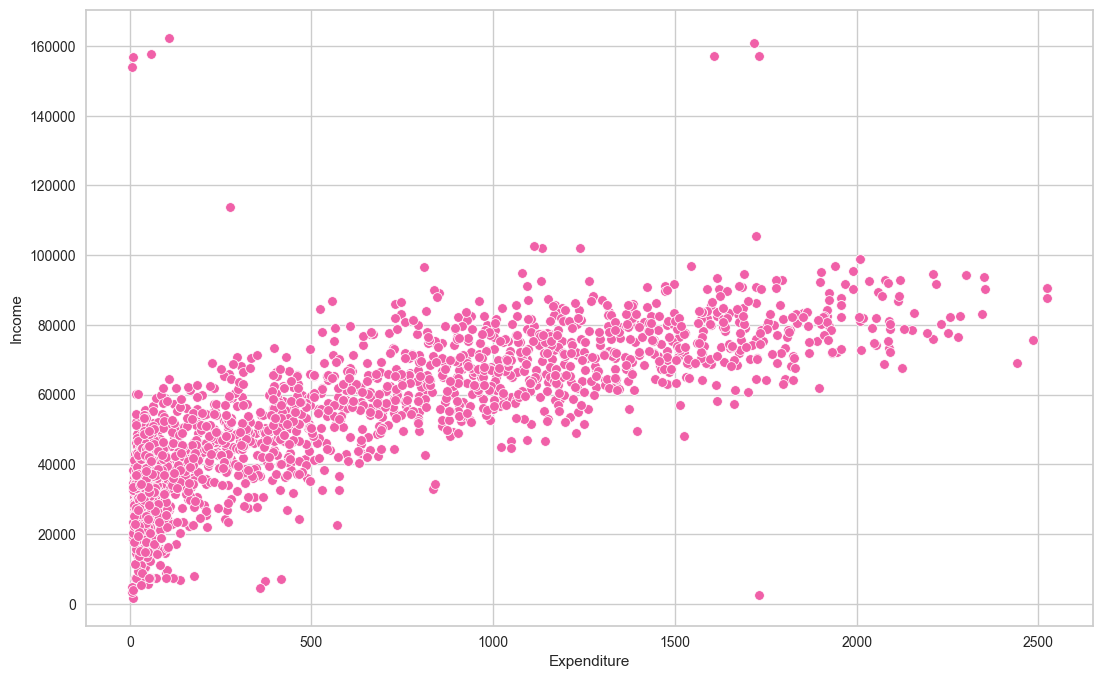

In [92]:
#Plot of Expenditure and Income of Customer
plt.figure(figsize=(13,8))
sns.scatterplot(x=df[df['Income']<600000]['Expenditure'], y=df[df['Income']<600000]['Income'], color='#f060a8')

<Axes: xlabel='Expenditure', ylabel='Age'>

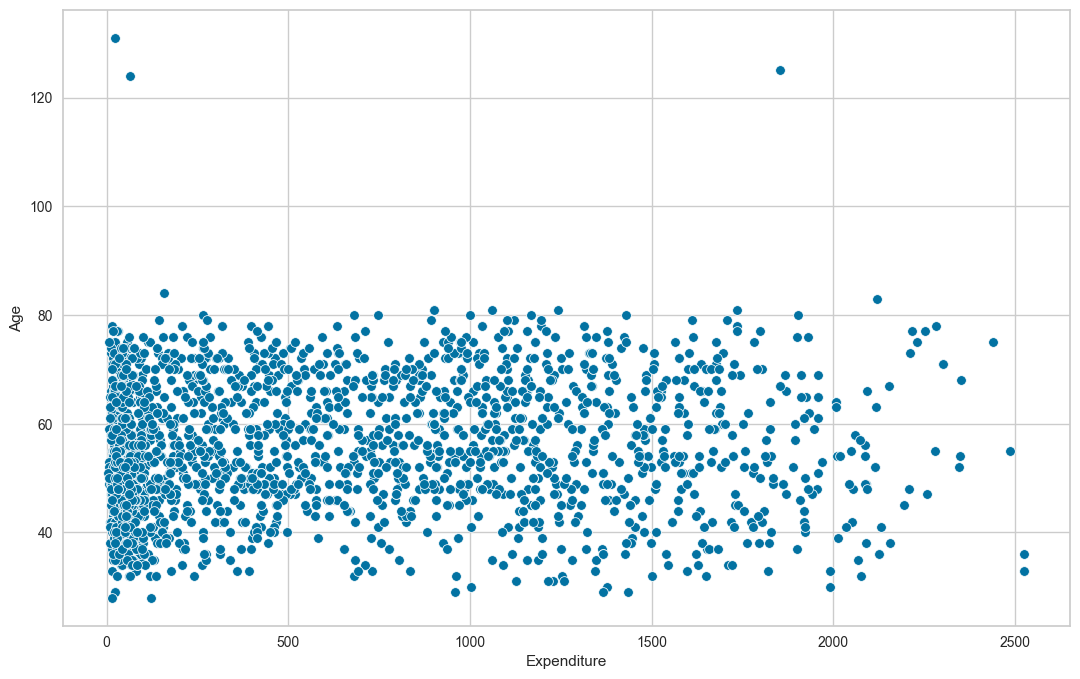

In [93]:
#Plot of Expenditure and Age of Customer
plt.figure(figsize=(13,8))
sns.scatterplot(x=df['Expenditure'], y=df['Age'])

<Axes: xlabel='Expenditure', ylabel='Count'>

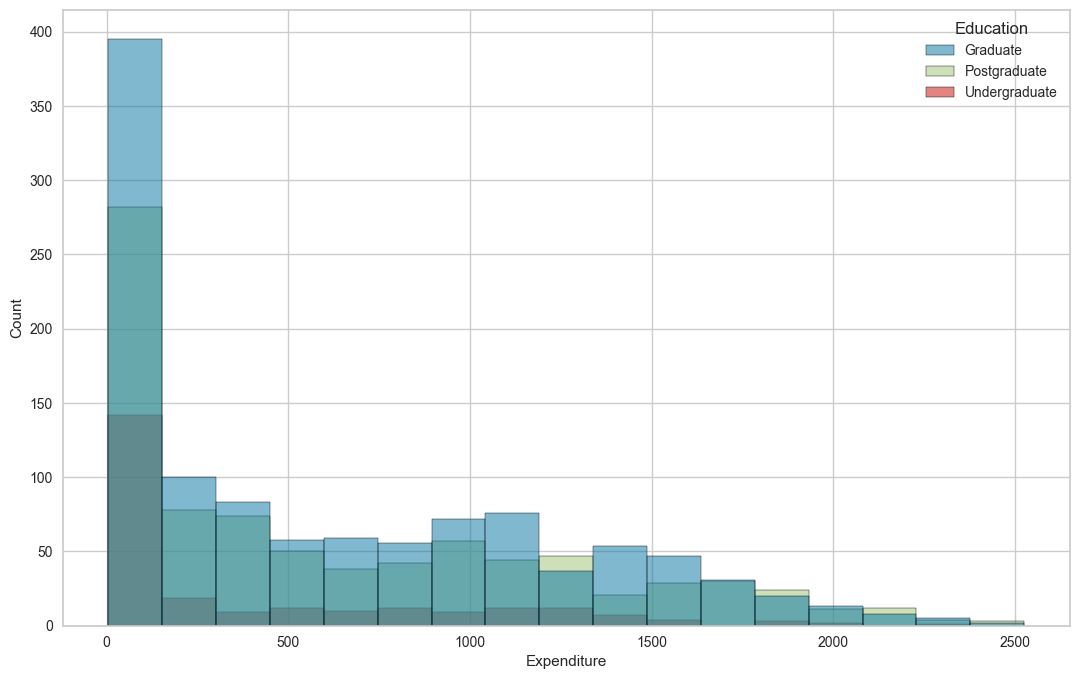

In [94]:
#Plot of Expenditure  and Education of Customer
plt.figure(figsize=(13,8))
sns.histplot(x=df['Expenditure'], hue=df['Education'])

<Axes: ylabel='count'>

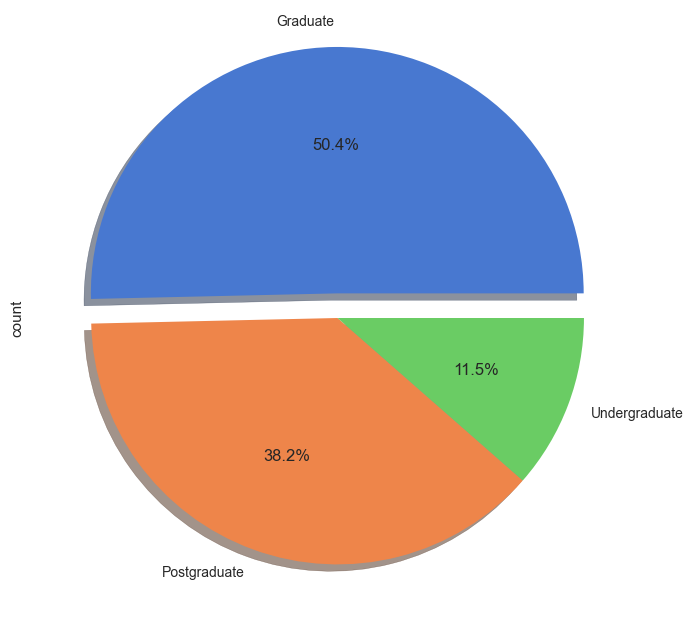

In [95]:
#Plot of Education
df['Education'].value_counts().plot.pie(explode=[0.1,0,0], autopct='%1.1f%%', shadow=True, figsize=(8,8), colors=sns.color_palette('muted'))
     

Outlier Detection

<Axes: xlabel='Age', ylabel='Density'>

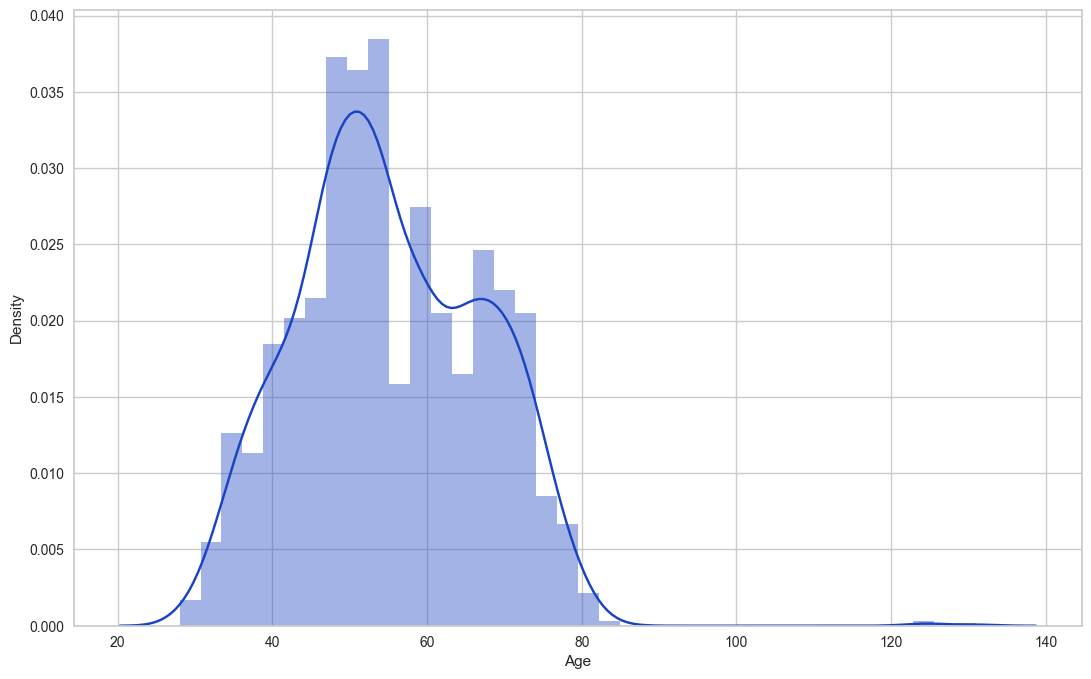

In [96]:
#Plot of Age of Customer
plt.figure(figsize=(13,8))
sns.distplot(df.Age, color='#1943c2')

<Axes: xlabel='Income', ylabel='Density'>

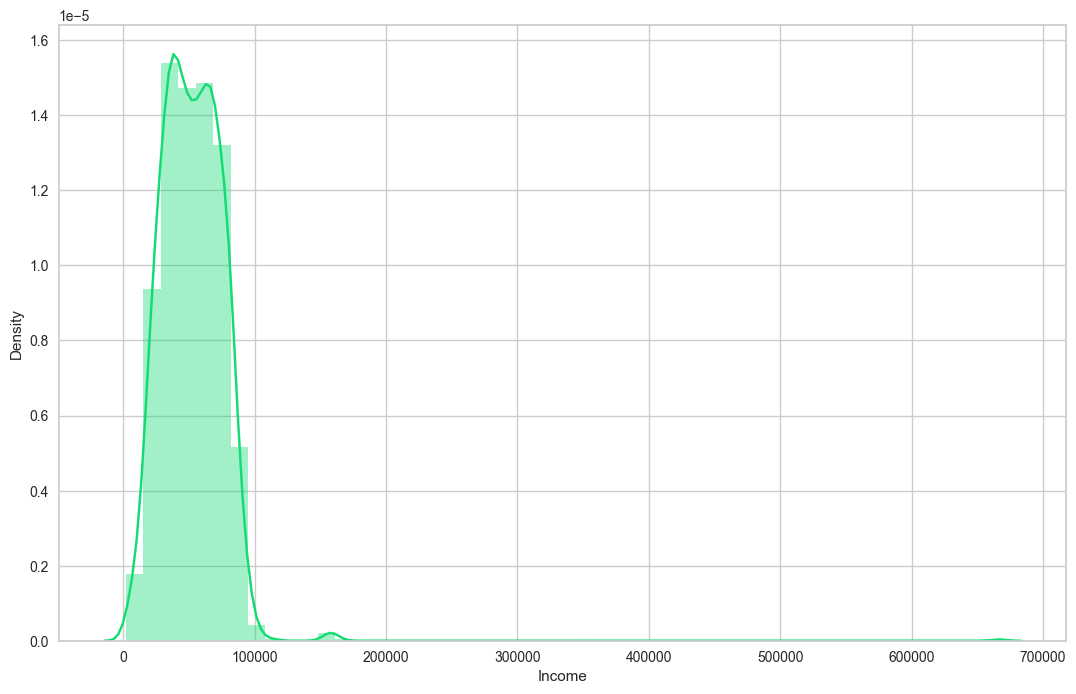

In [97]:
#Plot of Income of Customer
plt.figure(figsize=(13,8))
sns.distplot(df.Income, color='#14db74')

<Axes: xlabel='Expenditure', ylabel='Density'>

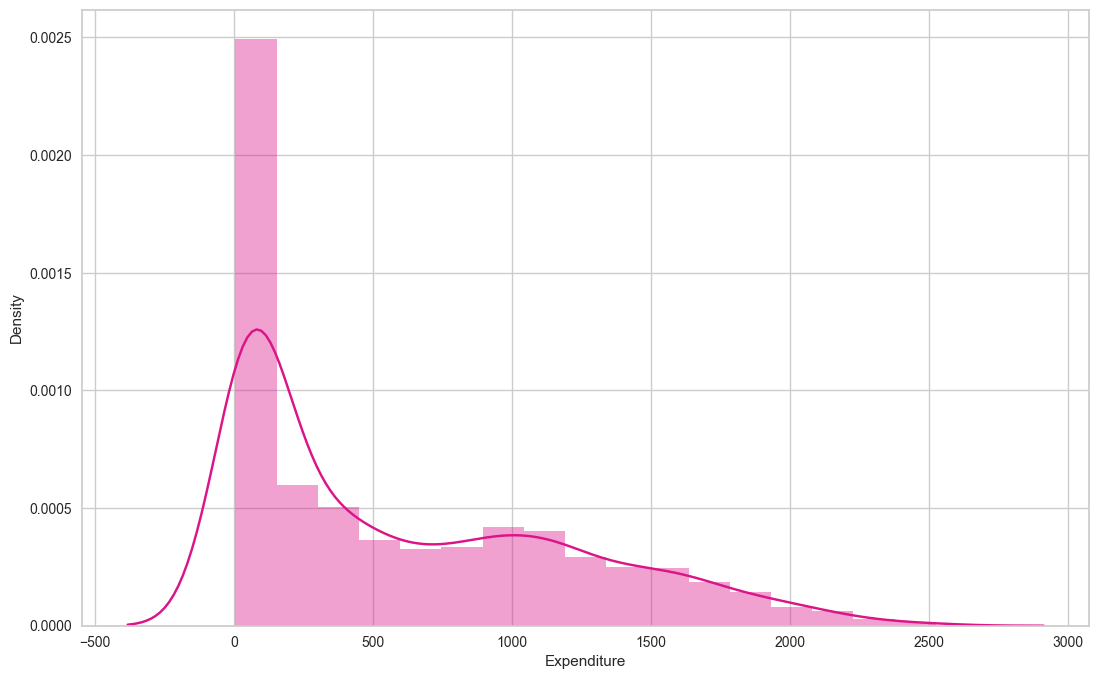

In [98]:
#Plot of Age of Customer
plt.figure(figsize=(13,8))
sns.distplot(df.Expenditure, color='#db1488')

In [99]:
#Detect outliers 
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=df['Age'], notched=True, name='Age', marker_color = '#6699ff', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 2)

fig.add_trace(go.Box(y=df['Income'], notched=True, name='Income', marker_color = '#ff0066', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 1)

fig.add_trace(go.Box(y=df['Expenditure'], notched=True, name='Expenditure', marker_color = 'lightseagreen', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 3)

fig.update_layout(title_text='Box Plots for Numerical Variables')

fig.show()
     

In [100]:
df.head(1)

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  Graduate  58138.0        0         0       58       635         88   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   

   AcceptedCmp2  Complain  Response  Age  Expenditure Stays_With  Offspring  \
0             0         0         1   67         1617      Alone          0   

   Family_Size  Is_Parent  
0            1          0

In [101]:
numerical = ['Income', 'Recency', 'Age', 'Expenditure']

In [102]:
def detect_outliers(d):
  for i in d:
    Q3, Q1 = np.percentile(df[i], [75 ,25])
    IQR = Q3 - Q1

    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    outliers = df[i][(df[i] > ul) | (df[i] < ll)]
    print(f'*** {i} outlier points***', '\n', outliers, '\n')


In [103]:
detect_outliers(numerical)

*** Income outlier points*** 
 164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64 

*** Recency outlier points*** 
 Series([], Name: Recency, dtype: int64) 

*** Age outlier points*** 
 192    124
239    131
339    125
Name: Age, dtype: int64 

*** Expenditure outlier points*** 
 1179    2525
1492    2524
1572    2525
Name: Expenditure, dtype: int64 



In [104]:
df = df[(df['Age']<100)]
df = df[(df['Income']<600000)]





In [105]:

df.shape

(2212, 29)

In [107]:

categorical = [var for var in df.columns if df[var].dtype=='O']
# check the number of different labels
for var in categorical:
    print(df[var].value_counts() / float(len(df)))
    print()
    print()


Education
Graduate         0.504069
Postgraduate     0.382007
Undergraduate    0.113924
Name: count, dtype: float64


Stays_With
Partner    0.64557
Alone      0.35443
Name: count, dtype: float64




In [108]:

categorical

['Education', 'Stays_With']

In [109]:
df['Stays_With'].unique()

array(['Alone', 'Partner'], dtype=object)

In [110]:
df['Education'].unique()

array(['Graduate', 'Postgraduate', 'Undergraduate'], dtype=object)

In [111]:

df['Education'] = df['Education'].map({'Undergraduate':0,'Graduate':1, 'Postgraduate':2})
     

df['Stays_With'] = df['Stays_With'].map({'Alone':0,'Partner':1})


In [112]:
df.dtypes

Education                int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Age                      int64
Expenditure              int64
Stays_With               int64
Offspring                int64
Family_Size              int64
Is_Parent                int32
dtype: object

In [113]:
df.head(3)

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0          1  58138.0        0         0       58       635         88   
1          1  46344.0        1         1       38        11          1   
2          1  71613.0        0         0       26       426         49   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   

   AcceptedCmp2  Complain  Response  Age  Expenditure  Stays_With  Offspring  \
0             0         0         1   67         1617           0          0   
1             0         0         0   70           27           0          2   
2             0         0         0   59          776           1          0   

   Family_Size  Is_Parent  
0            1          0  
1            3          1  
2            2          0

<Axes: >

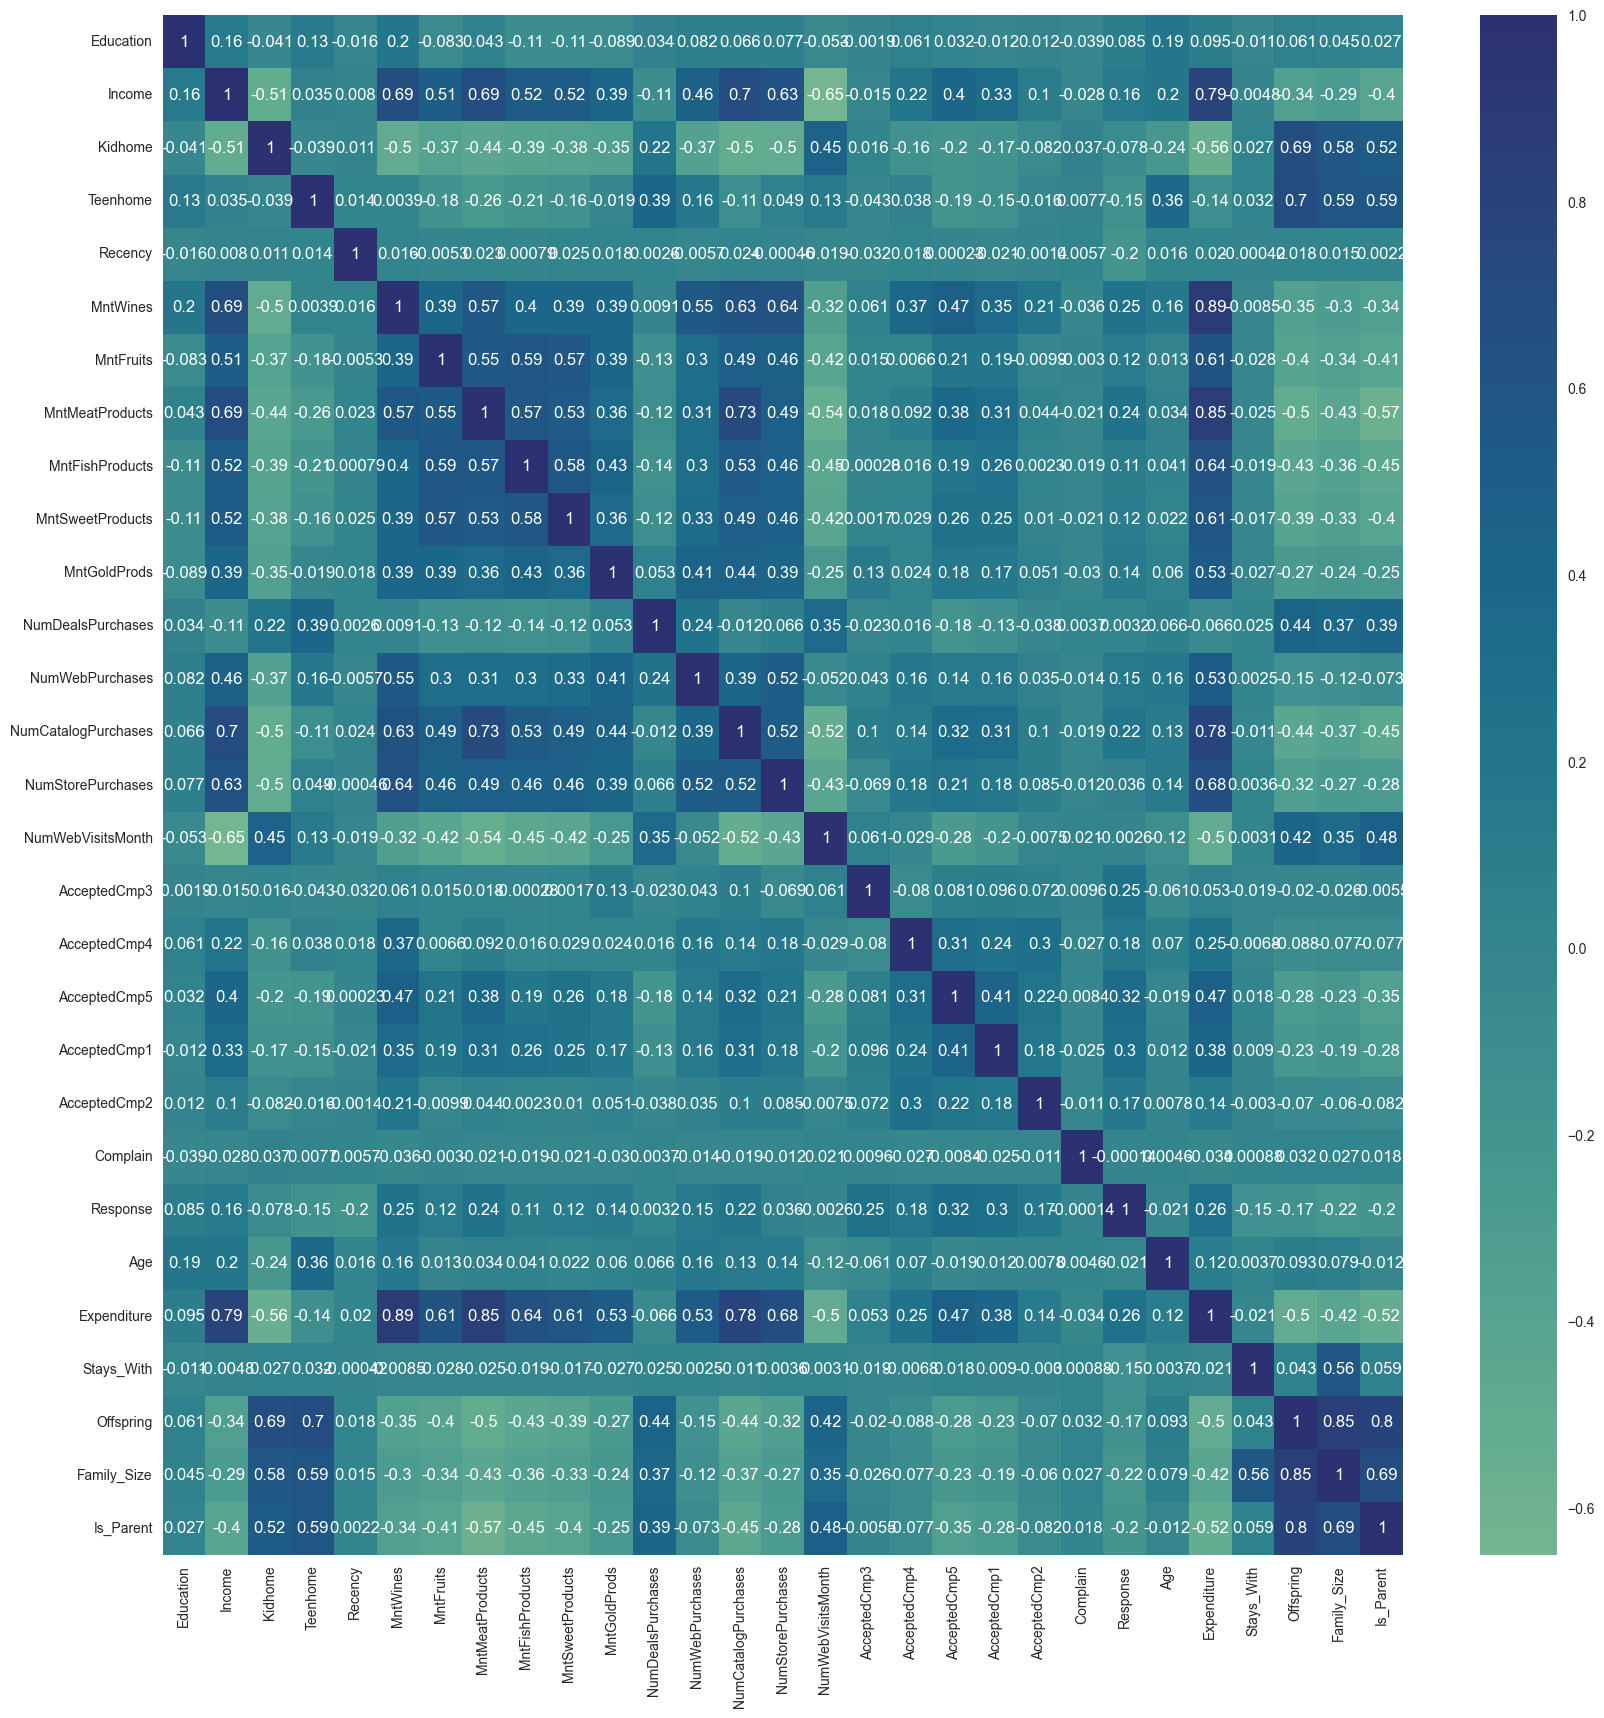

In [114]:
corrmat = df.corr()

plt.figure(figsize=(20,20))  
sns.heatmap(corrmat, annot = True, cmap = 'crest', center = 0)

Feature Scaling

In [115]:
df_old = df.copy()

In [116]:
# drop columns
drop_columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df = df.drop(drop_columns , axis=1)

In [150]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [151]:
df.head(3)

Education    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0  -0.411675  0.287105 -0.822754 -0.929699  0.310353  0.977660   1.552041   
1  -0.411675 -0.260882  1.040021  0.908097 -0.380813 -0.872618  -0.637461   
2  -0.411675  0.913196 -0.822754 -0.929699 -0.795514  0.357935   0.570540   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0         1.690293         2.453472          1.483713      0.852576   
1        -0.718230        -0.651004         -0.634019     -0.733642   
2        -0.178542         1.339513         -0.147184     -0.037254   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0           0.351030         1.426865             2.503607          -0.555814   
1          -0.168701        -1.126420            -0.571340          -1.171160   
2          -0.688432         1.426865            -0.229679           1.290224   

   NumWebVisitsMonth       Age  Expenditure  Stays_With  Offspring  \
0           0.692181  1.018352     1.676245   -1.349603  -1.264598   
1          -0.132545  1.274785    -0.963297   -1.349603   1.404572   
2          -0.544908  0.334530     0.280110    0.740959  -1.264598   

   Family_Size  Is_Parent  Clusters  
0    -1.758359  -1.581139 -0.310687  
1     0.449070   0.632456  1.801732  
2    -0.654644  -1.581139  0.393452

Dimensionality Reduction

In [152]:
p = PCA(n_components=3)
p.fit(df)

PCA(n_components=3)

In [153]:
W = p.components_.T
W

array([[ 1.30778771e-02,  1.44277528e-01, -4.70771426e-01],
       [ 2.81248858e-01,  1.77878164e-01, -8.76658983e-02],
       [-2.45692674e-01,  5.76058529e-03,  2.69015093e-01],
       [-9.37194917e-02,  4.61594829e-01, -1.34887786e-01],
       [ 3.71636597e-03,  1.63414769e-02,  2.70181007e-02],
       [ 2.55668617e-01,  1.95331827e-01, -7.14503115e-02],
       [ 2.36504204e-01, -2.18575420e-03,  2.53321278e-01],
       [ 2.83905038e-01,  3.46528569e-05,  7.86274537e-02],
       [ 2.46940306e-01, -1.14624037e-02,  2.45744737e-01],
       [ 2.35683002e-01,  9.38301189e-03,  2.52354483e-01],
       [ 1.87969033e-01,  1.10934749e-01,  2.14824588e-01],
       [-7.54951077e-02,  3.39479300e-01,  1.88189814e-01],
       [ 1.68843410e-01,  2.83371310e-01,  6.95469695e-02],
       [ 2.76613344e-01,  9.47168407e-02,  3.11027304e-02],
       [ 2.41628747e-01,  1.92147752e-01,  2.15568134e-02],
       [-2.25384885e-01,  4.40103706e-02,  1.24000647e-01],
       [ 4.07595259e-02,  2.35408023e-01

In [154]:
pd.DataFrame(W, index=df.columns, columns=['W1','W2','W3'])

W1        W2        W3
Education            0.013078  0.144278 -0.470771
Income               0.281249  0.177878 -0.087666
Kidhome             -0.245693  0.005761  0.269015
Teenhome            -0.093719  0.461595 -0.134888
Recency              0.003716  0.016341  0.027018
MntWines             0.255669  0.195332 -0.071450
MntFruits            0.236504 -0.002186  0.253321
MntMeatProducts      0.283905  0.000035  0.078627
MntFishProducts      0.246940 -0.011462  0.245745
MntSweetProducts     0.235683  0.009383  0.252354
MntGoldProds         0.187969  0.110935  0.214825
NumDealsPurchases   -0.075495  0.339479  0.188190
NumWebPurchases      0.168843  0.283371  0.069547
NumCatalogPurchases  0.276613  0.094717  0.031103
NumStorePurchases    0.241629  0.192148  0.021557
NumWebVisitsMonth   -0.225385  0.044010  0.124001
Age                  0.040760  0.235408 -0.401418
Expenditure          0.319061  0.118345  0.063959
Stays_With          -0.027377  0.115883  0.290604
Offspring           -0.244085  0.339332  0.094782
Family_Size         -0.216314  0.341811  0.231810
Is_Parent           -0.239721  0.289828  0.097258
Clusters             0.099265  0.203177 -0.234086

In [155]:
pd.DataFrame(W, index=df.columns, columns=['W1','W2','W3'])

W1        W2        W3
Education            0.013078  0.144278 -0.470771
Income               0.281249  0.177878 -0.087666
Kidhome             -0.245693  0.005761  0.269015
Teenhome            -0.093719  0.461595 -0.134888
Recency              0.003716  0.016341  0.027018
MntWines             0.255669  0.195332 -0.071450
MntFruits            0.236504 -0.002186  0.253321
MntMeatProducts      0.283905  0.000035  0.078627
MntFishProducts      0.246940 -0.011462  0.245745
MntSweetProducts     0.235683  0.009383  0.252354
MntGoldProds         0.187969  0.110935  0.214825
NumDealsPurchases   -0.075495  0.339479  0.188190
NumWebPurchases      0.168843  0.283371  0.069547
NumCatalogPurchases  0.276613  0.094717  0.031103
NumStorePurchases    0.241629  0.192148  0.021557
NumWebVisitsMonth   -0.225385  0.044010  0.124001
Age                  0.040760  0.235408 -0.401418
Expenditure          0.319061  0.118345  0.063959
Stays_With          -0.027377  0.115883  0.290604
Offspring           -0.244085  0.339332  0.094782
Family_Size         -0.216314  0.341811  0.231810
Is_Parent           -0.239721  0.289828  0.097258
Clusters             0.099265  0.203177 -0.234086

In [156]:
p.explained_variance_

array([8.34736087, 3.0107941 , 1.4676905 ])

In [157]:
p.explained_variance_ratio_

array([0.36276466, 0.13084491, 0.06378378])

In [158]:
pd.DataFrame(p.explained_variance_ratio_, index=range(1,4), columns=['Explained Variability'])

Explained Variability
1               0.362765
2               0.130845
3               0.063784

In [128]:
p.explained_variance_ratio_.cumsum()

array([0.99950708, 0.99991031, 0.99997959])

Text(0, 0.5, 'Lambda i')

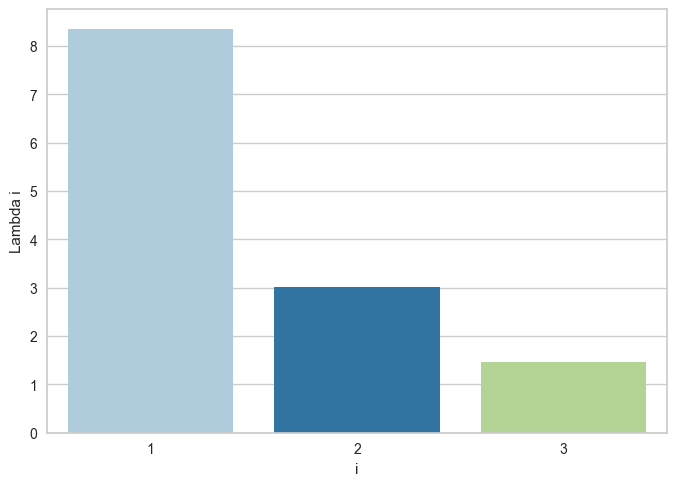

In [159]:
sns.barplot(x = list(range(1,4)), y = p.explained_variance_, palette = 'Paired')
plt.xlabel('i')
plt.ylabel('Lambda i')

In [160]:
df_PCA = pd.DataFrame(p.transform(df), columns=(['col1', 'col2', 'col3']))
     

In [161]:
df_PCA.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0 -1.220643e-16  2.889180 -5.972571 -2.593182 -0.747752  2.424818   
col2  2212.0  3.212219e-17  1.735164 -4.471689 -1.386241 -0.105978  1.308408   
col3  2212.0 -2.890997e-17  1.211485 -3.998819 -0.866740 -0.006152  0.828171   

           max  
col1  7.444202  
col2  6.089454  
col3  5.304697

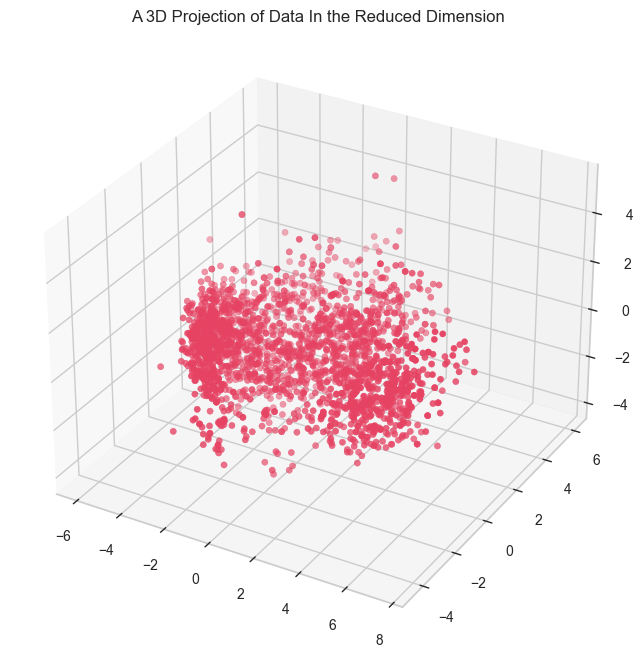

In [162]:
x = df_PCA['col1']
y = df_PCA['col2']
z = df_PCA['col3']

fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='#e64363', marker='o')
ax.set_title('A 3D Projection of Data In the Reduced Dimension')
plt.show()
     

Train the model using K-means clustering

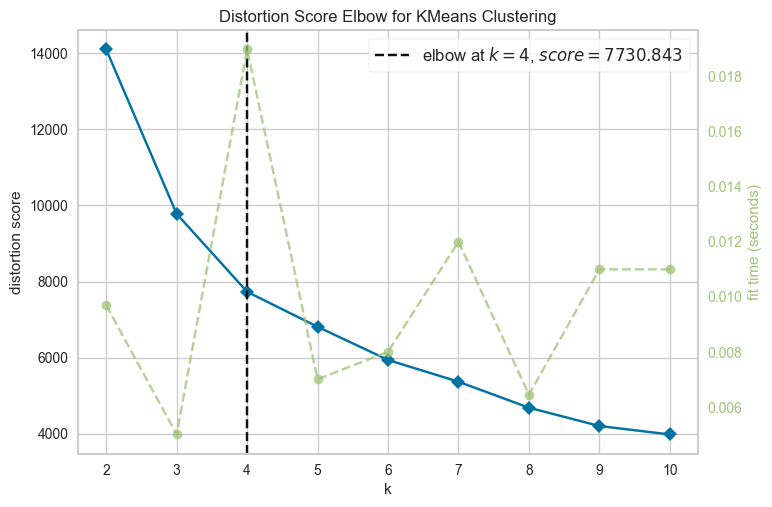

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [163]:
# Elbow Method to determine the number of clusters to be formed.
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_PCA)
Elbow_M.show()

In [164]:
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(df_PCA)
df_PCA['Clusters'] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df['Clusters'] = yhat_AC
df_old['Clusters'] = yhat_AC

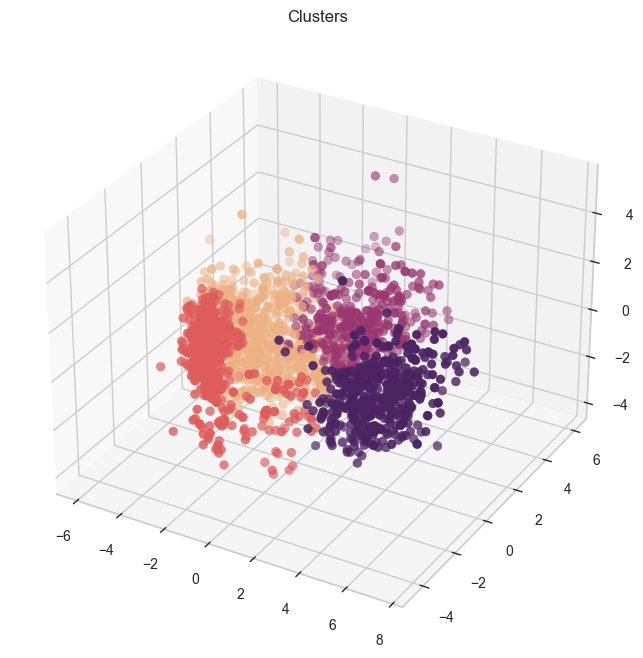

In [165]:
fig = plt.figure(figsize=(13,8))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x, y, z, s=40, c=df_PCA['Clusters'], marker='o', cmap='flare')
ax.set_title('Clusters')
plt.show()

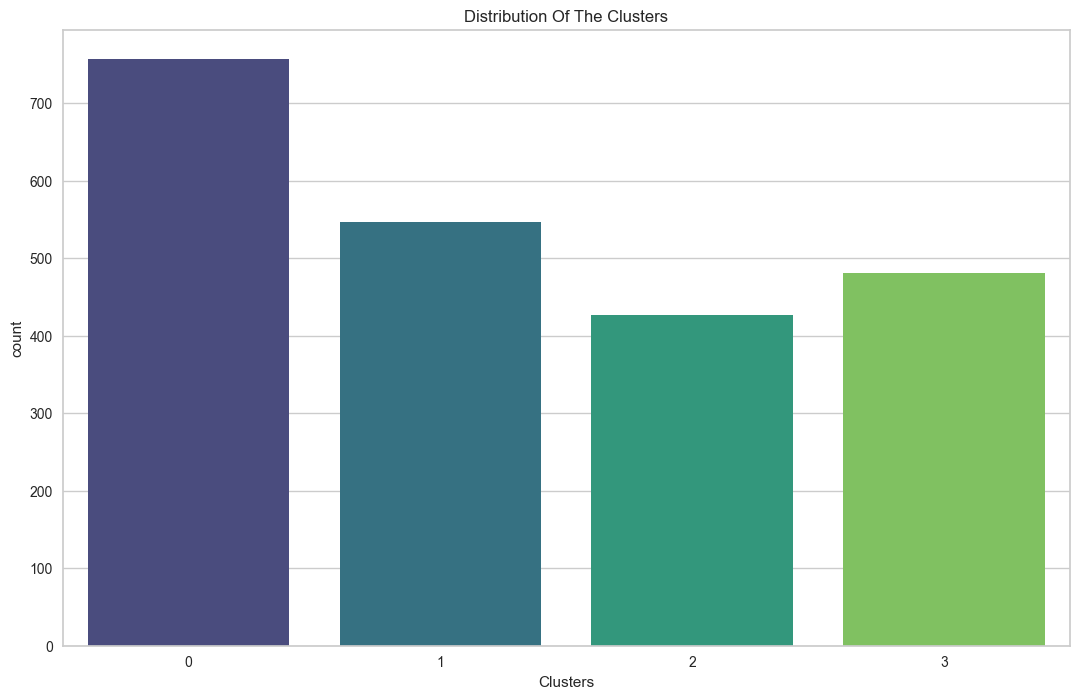

In [166]:
plt.figure(figsize=(13,8))
pl = sns.countplot(x=df['Clusters'], palette= "viridis")
pl.set_title('Distribution Of The Clusters')
plt.show()

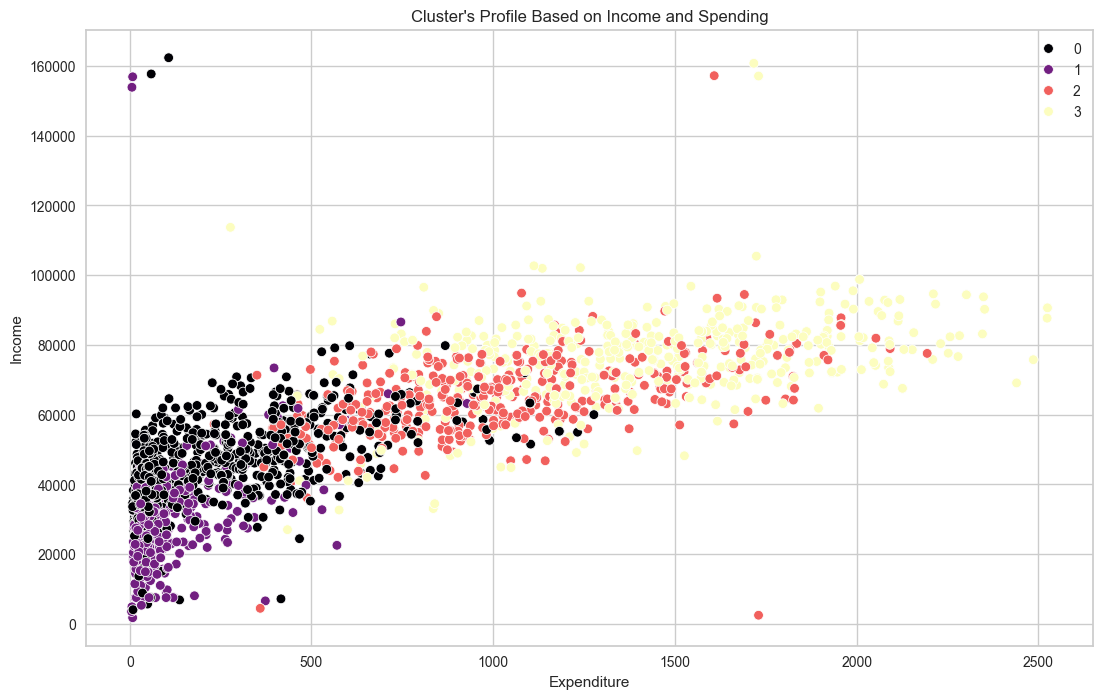

In [167]:
plt.figure(figsize=(13,8))
pl = sns.scatterplot(data=df_old, x=df_old['Expenditure'], y=df_old['Income'], hue=df_old['Clusters'], palette= "magma")
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.legend()

Cluster Patterns

- **group 0** is indicated in black and have average expenditure and average income
- **group 1** is indicated in purple and have low expenditure and low income
- **group 2** is indicated in orange and have high expenditure and average income
- **group 3** is indicated in yellow and have high expenditure and high income

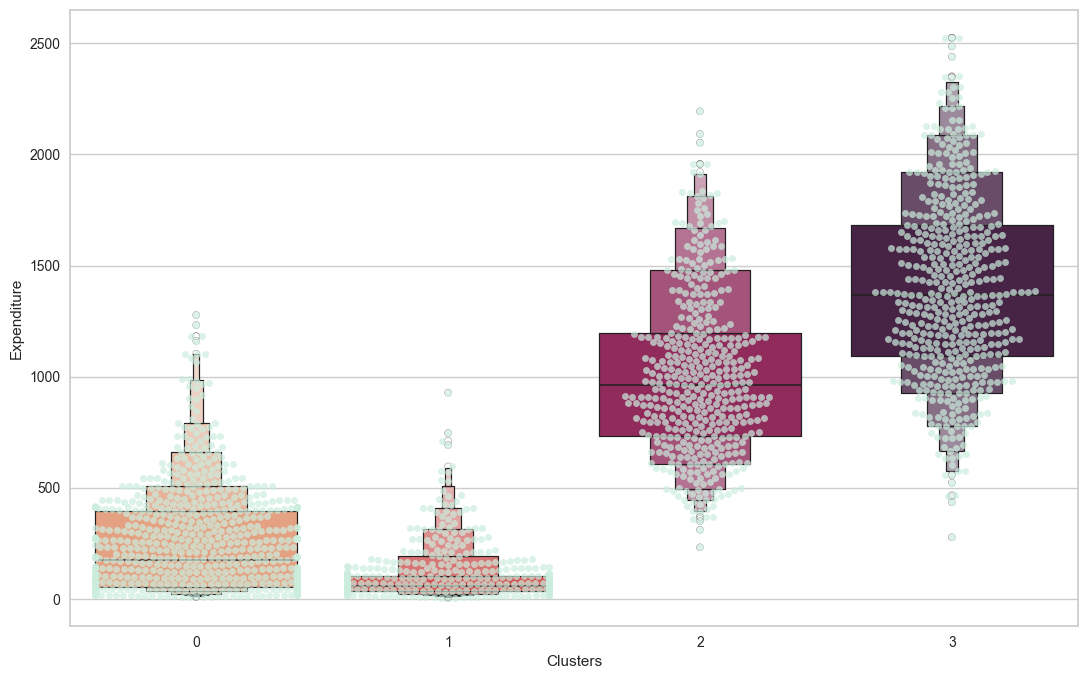

In [168]:
plt.figure(figsize=(13,8))
pl = sns.swarmplot(x=df_old['Clusters'], y=df_old['Expenditure'], color="#CBEDDD", alpha=0.7)
pl = sns.boxenplot(x=df_old['Clusters'], y=df_old['Expenditure'], palette= "rocket_r")
plt.show()

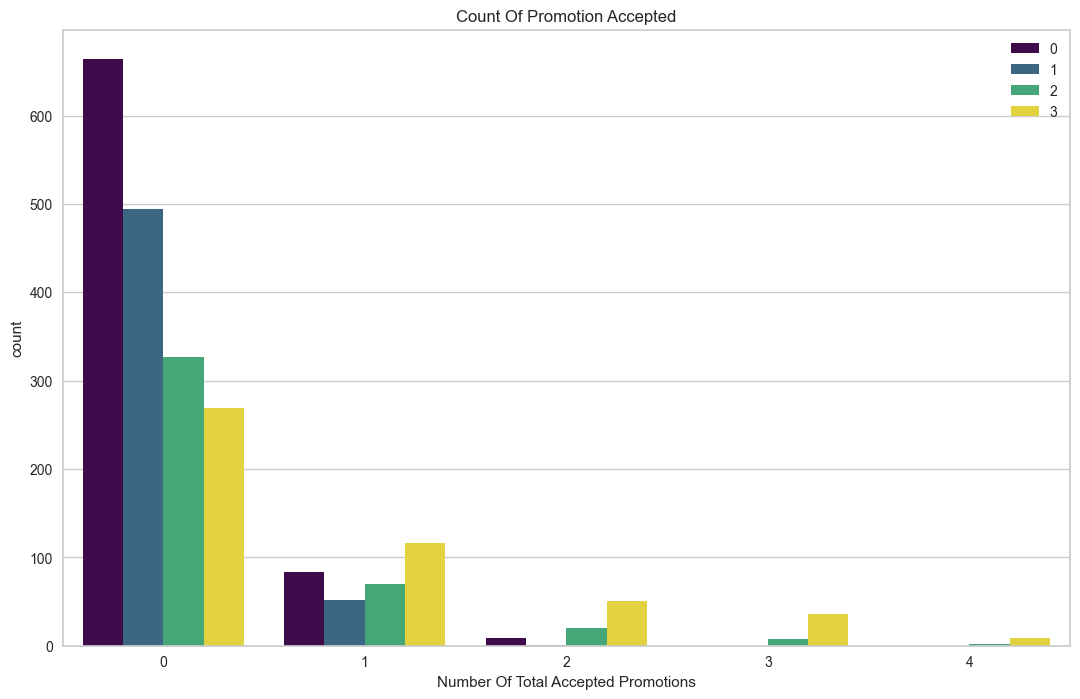

In [169]:
df_old['Total_Promos'] = df_old['AcceptedCmp1']+ df_old['AcceptedCmp2']+ df_old['AcceptedCmp3']+ df_old['AcceptedCmp4']+ df_old['AcceptedCmp5']

plt.figure(figsize=(13,8))
pl = sns.countplot(x=df_old['Total_Promos'], hue=df_old['Clusters'], palette= "viridis")
pl.set_title('Count Of Promotion Accepted')
pl.set_xlabel('Number Of Total Accepted Promotions')
plt.legend(loc='upper right')
plt.show()

Text(0.5, 1.0, 'Number of Deals Purchased')

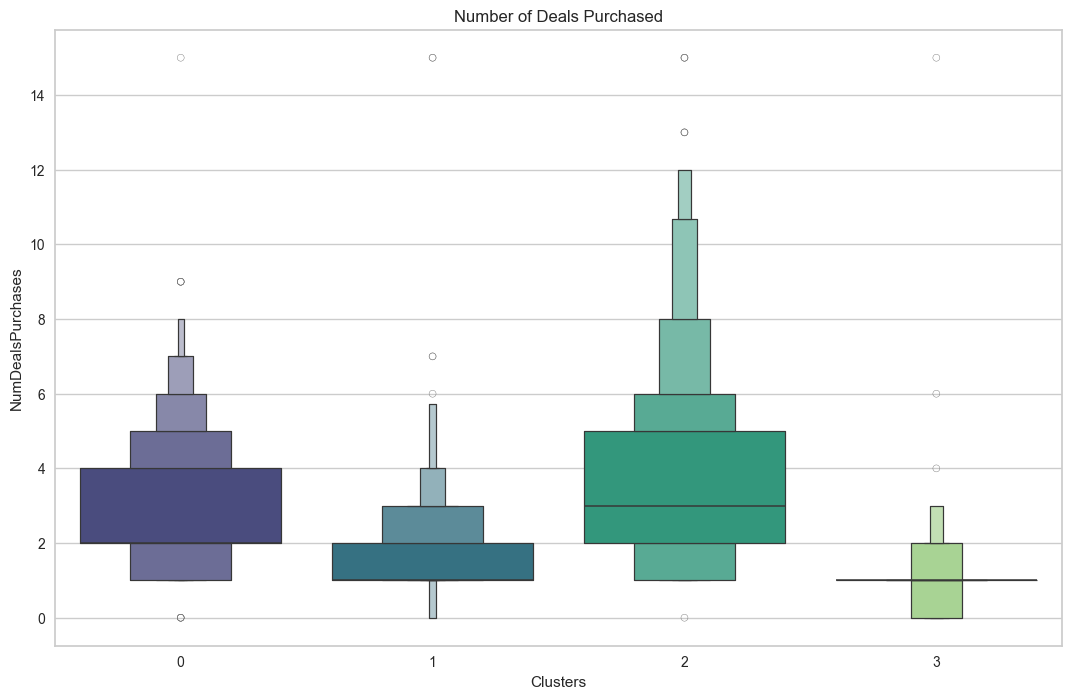

In [170]:
plt.figure(figsize=(13,8))
pl=sns.boxenplot(y=df_old['NumDealsPurchases'],x=df_old['Clusters'],  palette= "viridis")
pl.set_title('Number of Deals Purchased')

In [172]:
plt.figure(figsize=(13,8))
sns.jointplot(x=df_old['Kidhome'], y=df_old['Expenditure'], hue=df_old['Clusters'], kind='kde', palette= "magma")

<Figure size 1300x800 with 0 Axes>

In [173]:
plt.figure(figsize=(13,8))
sns.jointplot(x=df_old['Stays_With'], y=df_old['Expenditure'], hue=df_old['Clusters'], kind='kde', palette= "magma")

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

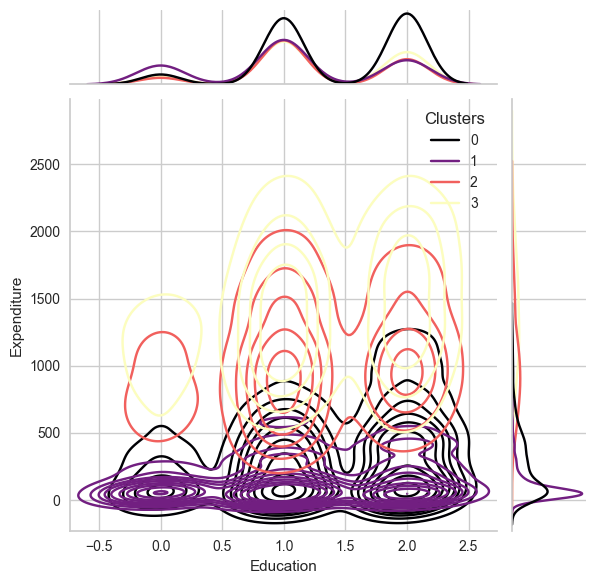

In [174]:
plt.figure(figsize=(13,8))
sns.jointplot(x=df_old['Education'], y=df_old['Expenditure'], hue=df_old['Clusters'], kind='kde', palette= "magma")

In [175]:
plt.figure(figsize=(13,8))
sns.jointplot(x=df_old['Is_Parent'], y=df_old['Expenditure'], hue=df_old['Clusters'], kind='kde', palette= "magma")

<Figure size 1300x800 with 0 Axes>

In [176]:
plt.figure(figsize=(13,8))
sns.jointplot(x=df_old['Family_Size'], y=df_old['Expenditure'], hue=df_old['Clusters'], kind='kde', palette= "magma")

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

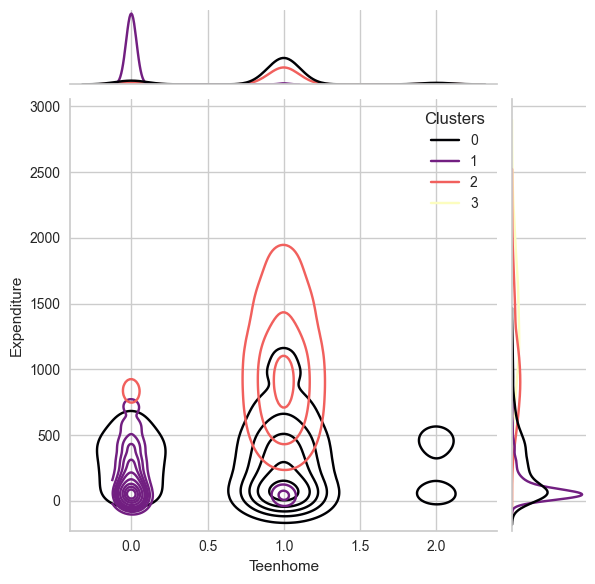

In [177]:
plt.figure(figsize=(13,8))
sns.jointplot(x=df_old['Teenhome'], y=df_old['Expenditure'], hue=df_old['Clusters'], kind='kde', palette= "magma")

<Figure size 1300x800 with 0 Axes>

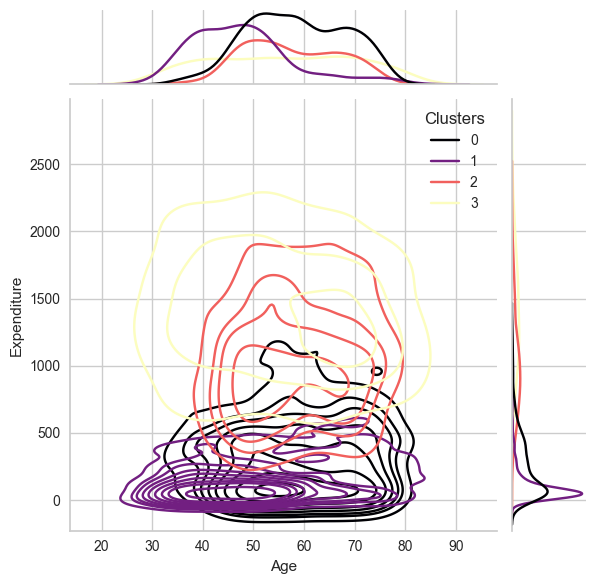

In [178]:
plt.figure(figsize=(13,8))
sns.jointplot(x=df_old['Age'], y=df_old['Expenditure'], hue=df_old['Clusters'], kind='kde', palette= "magma")

<Figure size 1300x800 with 0 Axes>

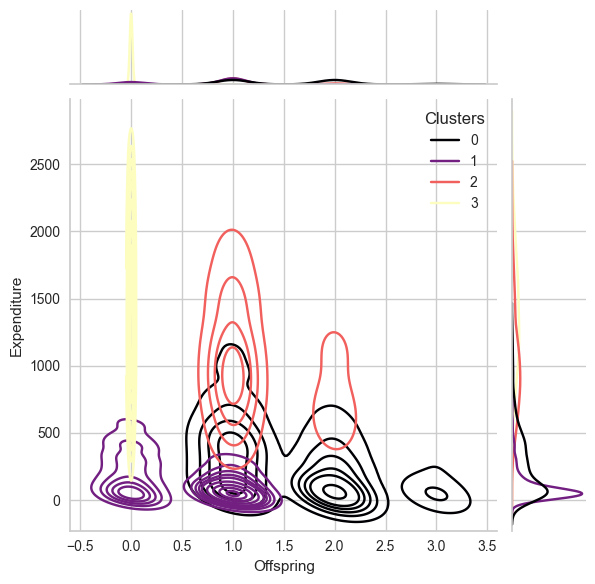

In [179]:
plt.figure(figsize=(13,8))
sns.jointplot(x=df_old['Offspring'], y=df_old['Expenditure'], hue=df_old['Clusters'], kind='kde', palette= "magma")

Inference:

- **Cluster 0** has customers who are mostly parents with atleast 2 kids , with around five members in the family. Indicated by black

- **Cluster 1** has customers who are mostly parents with  one or no kid , with around of three members in the family. Indicated by purple.

- **Cluster 2** has customers who are mostly parents with maximum of two kids , with around of four members in the family. Indicated by orange.

- **Cluster 3** has customers not parents , with around of two members in the family. Indicated by yellow.

